# Accesos por tecnologia


## ETL

Importamos las librerias necesarias.

In [37]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore', category=UserWarning, append=True)

Importamos El dataset de `Accesos por Tecnologia` a utilizar.


In [16]:
tecnologia = pd.read_csv('../Datasets/Accesos Por Tecnología.csv')
tecnologia.rename(columns={"Fibra óptica": "Fibra_optica"}, inplace=True)

Veamos la informacion del dataset de tecnologia y los primeros 15 registros del dataset.

In [17]:
print(tecnologia.info())
print()
tecnologia.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           961 non-null    object 
 1   Trimestre     961 non-null    object 
 2   Provincia     960 non-null    object 
 3   ADSL          960 non-null    float64
 4   Cablemodem    960 non-null    float64
 5   Fibra_optica  960 non-null    float64
 6   Wireless      960 non-null    float64
 7   Otros         960 non-null    float64
 8   Total         960 non-null    float64
dtypes: float64(6), object(3)
memory usage: 67.8+ KB
None



,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra_optica,Wireless,Otros,Total
0,2023,4,Buenos Aires,223391.0,2797700.0,1784593.0,137993.0,67943.0,5011620.0
1,2023,4,Capital Federal,58700.0,1198835.0,182520.0,4492.0,29820.0,1474367.0
2,2023,4,Catamarca,6669.0,11016.0,55437.0,1384.0,81.0,74587.0
3,2023,4,Chaco,14000.0,60277.0,62301.0,8404.0,2404.0,147386.0
4,2023,4,Chubut,26306.0,77217.0,26174.0,30543.0,9930.0,170170.0
5,2023,4,Córdoba,115662.0,452380.0,440536.0,61862.0,8862.0,1079302.0
6,2023,4,Corrientes,21769.0,86102.0,35968.0,10402.0,5231.0,159472.0
7,2023,4,Entre Ríos,41794.0,159575.0,61667.0,24036.0,11565.0,298637.0
8,2023,4,Formosa,10252.0,18325.0,16179.0,17061.0,185.0,62002.0
9,2023,4,Jujuy,11669.0,51083.0,49947.0,4105.0,1216.0,118020.0


Encontramos que Año y Trimestre tiene el formato incorrecto, veamos si encontramos datos no numericos.
Para eso hare una funcion `lamba` que verifica si el dato es numerico, en el caso que no lo sea se convierte en nulo.
Despues verificamos que datos son nulos para hacer una mascara y mostrarlo en un dataframe.

In [18]:
non_numeric = tecnologia["Año"].apply(lambda x: pd.to_numeric(x, errors='coerce')).isna()
tecnologia[non_numeric]

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra_optica,Wireless,Otros,Total
408,2019 *,3 *,Buenos Aires,1277249.0,2144956.0,425386.0,85572.0,27070.0,3960233.0
409,2019 *,3 *,Capital Federal,300288.0,1080973.0,24900.0,3895.0,31155.0,1441211.0
410,2019 *,3 *,Catamarca,24349.0,5543.0,13.0,244.0,2251.0,32400.0
411,2019 *,3 *,Chaco,50416.0,49156.0,8063.0,5224.0,1592.0,114451.0
412,2019 *,3 *,Chubut,37298.0,27090.0,1917.0,15149.0,7551.0,89005.0
...,...,...,...,...,...,...,...,...,...
477,2019 *,1 *,Santiago Del Estero,25337.0,61547.0,23.0,2847.0,99.0,89853.0
478,2019 *,1 *,Tierra Del Fuego,19789.0,23549.0,1623.0,0.0,1486.0,46447.0
479,2019 *,1 *,Tucumán,159215.0,11670.0,118.0,678.0,321.0,172002.0
960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vemos que tanto Año como Trimestre tienen un ``*`` sus datos, los modificares para que sean datos numericos.
Usaremos la funcion `replace` que buscara un * en las columnas y las borrar.  

In [19]:
tecnologia["Año"] = tecnologia["Año"].str.replace("*", "")
tecnologia["Trimestre"] = tecnologia["Trimestre"].str.replace("*", "")

Tambien Encontramos que los ultimos 2 registros no contienen informacion, o se encuentra la aclaracion acerca de los datos faltantes de 2019. por lo tanto los eliminaremos.

In [38]:
tecnologia.dropna(inplace=True)
tecnologia[non_numeric]

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra_optica,Wireless,Otros,Total
408,2019,3,Buenos Aires,1277249.0,2144956.0,425386.0,85572.0,27070.0,3960233.0
409,2019,3,Capital Federal,300288.0,1080973.0,24900.0,3895.0,31155.0,1441211.0
410,2019,3,Catamarca,24349.0,5543.0,13.0,244.0,2251.0,32400.0
411,2019,3,Chaco,50416.0,49156.0,8063.0,5224.0,1592.0,114451.0
412,2019,3,Chubut,37298.0,27090.0,1917.0,15149.0,7551.0,89005.0
...,...,...,...,...,...,...,...,...,...
475,2019,1,Santa Cruz,10659.0,4615.0,382.0,6514.0,2735.0,24905.0
476,2019,1,Santa Fe,340038.0,340344.0,15621.0,23215.0,17860.0,737078.0
477,2019,1,Santiago Del Estero,25337.0,61547.0,23.0,2847.0,99.0,89853.0
478,2019,1,Tierra Del Fuego,19789.0,23549.0,1623.0,0.0,1486.0,46447.0


Ahora que los datos estan correctos convertiremos esos datos a numericos con la funcion `astype` y verificaremos el resultado.

In [21]:
tecnologia["Año"] = tecnologia["Año"].astype(int)
tecnologia["Trimestre"] = tecnologia["Trimestre"].astype(int)
tecnologia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 960 entries, 0 to 959
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           960 non-null    int64  
 1   Trimestre     960 non-null    int64  
 2   Provincia     960 non-null    object 
 3   ADSL          960 non-null    float64
 4   Cablemodem    960 non-null    float64
 5   Fibra_optica  960 non-null    float64
 6   Wireless      960 non-null    float64
 7   Otros         960 non-null    float64
 8   Total         960 non-null    float64
dtypes: float64(6), int64(2), object(1)
memory usage: 75.0+ KB


Con los datos correctos ya podemos continuar al EDA.

# EDA

Verificamos los datos para comprobar que no hay nulos ni duplicados en el dataset.

In [22]:
print("total de nulos: ", tecnologia.isnull().sum().sum())
print("total de duplicados: ", tecnologia.duplicated().sum().sum())

total de nulos:  0
total de duplicados:  0


Afortunadamente no hay duplicados ni nulos. Por lo que podemos continuar con los outliers.

## Outliers

### Tecnologia
Veremos los outliers de tecnologia que lo dividiremos en dos graficos porque tienen diferentes dimensiones de datos.

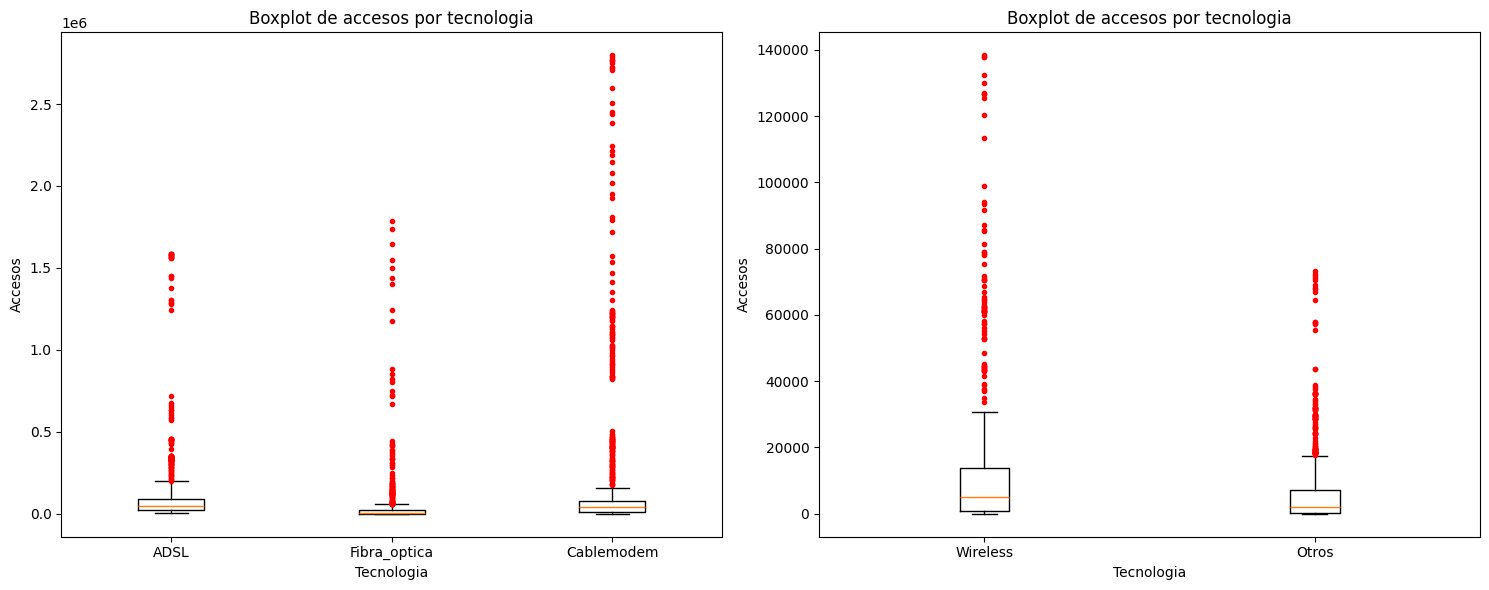

In [23]:
fg, axs = plt.subplots(1, 2, figsize=(15, 6))
axs[0].boxplot(tecnologia[['ADSL', 'Fibra_optica', 'Cablemodem']], sym='r.')
axs[0].set_title('Boxplot de accesos por tecnologia')
axs[0].set_xlabel('Tecnologia')
axs[0].set_ylabel('Accesos')
axs[0].set_xticklabels(['ADSL', 'Fibra_optica', 'Cablemodem'])

axs[1].boxplot(tecnologia[['Wireless', 'Otros']], sym='r.')
axs[1].set_title('Boxplot de accesos por tecnologia')
axs[1].set_xlabel('Tecnologia')
axs[1].set_ylabel('Accesos')
axs[1].set_xticklabels(['Wireless', 'Otros'])
plt.tight_layout()
plt.show()

Hay varios outliers en ambos graficos, y como son muchas columnas hare una funcion para encontrarlos.
la funcion `outliers_iqr` buscara los outliers a partir de los cuartiles y sus limites

In [24]:
def outliers_iqr(column: pd.Series) -> tuple:
    q1, q3 = column.quantile(0.25), column.quantile(0.75)
    iqr = q3 - q1
    
    top = q3 + 1.5 * iqr
    bot = q3 - 1.5 * iqr
    
    return ((column < bot) | (column > top))

Creada la funcion, creare 2 variables:
- columnas: Una lista que contiene los nombres de las columnas a buscar.
- outliers : Un diccionario que contiene almacenado que datos son outliers.

Itarare la variable columnas para buscar los outliers de la funcion creada y se almacenara

In [25]:
columnas = ["ADSL", 'Fibra_optica', 'Cablemodem', 'Wireless', 'Otros']
outliers = {}
for columna in columnas:
    outlier = outliers_iqr(tecnologia[columna])
    outliers[columna] = outlier

Mostrare los datos que son outliers y dare mi conclusion.

In [26]:
adsl  =tecnologia[outliers["ADSL"]]
print(adsl["Provincia"].value_counts())
adsl

Provincia
Buenos Aires       40
Santa Fe           34
Córdoba            32
Capital Federal    23
Name: count, dtype: int64


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra_optica,Wireless,Otros,Total
0,2023,4,Buenos Aires,223391.0,2797700.0,1784593.0,137993.0,67943.0,5011620.0
24,2023,3,Buenos Aires,237705.0,2784175.0,1740239.0,137921.0,68197.0,4968237.0
48,2023,2,Buenos Aires,265537.0,2766463.0,1645945.0,138405.0,69138.0,4885488.0
72,2023,1,Buenos Aires,304583.0,2761043.0,1551074.0,132458.0,71770.0,4820928.0
96,2022,4,Buenos Aires,325908.0,2767247.0,1499149.0,129910.0,72451.0,4794665.0
...,...,...,...,...,...,...,...,...,...
932,2014,2,Santa Fe,324101.0,178495.0,3085.0,6041.0,636.0,512358.0
936,2014,1,Buenos Aires,1567685.0,1000879.0,120960.0,16528.0,33824.0,2739876.0
937,2014,1,Capital Federal,445569.0,820161.0,17767.0,1866.0,14555.0,1299918.0
941,2014,1,Córdoba,336841.0,225769.0,347.0,3585.0,368.0,566910.0


In [27]:
cable = tecnologia[outliers["Cablemodem"]]
print(cable["Provincia"].value_counts())
cable

Provincia
Buenos Aires       40
Capital Federal    40
Córdoba            40
Santa Fe           40
Name: count, dtype: int64


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra_optica,Wireless,Otros,Total
0,2023,4,Buenos Aires,223391.0,2797700.0,1784593.0,137993.0,67943.0,5011620.0
1,2023,4,Capital Federal,58700.0,1198835.0,182520.0,4492.0,29820.0,1474367.0
5,2023,4,Córdoba,115662.0,452380.0,440536.0,61862.0,8862.0,1079302.0
20,2023,4,Santa Fe,97004.0,398670.0,355762.0,44521.0,13544.0,909501.0
24,2023,3,Buenos Aires,237705.0,2784175.0,1740239.0,137921.0,68197.0,4968237.0
...,...,...,...,...,...,...,...,...,...
932,2014,2,Santa Fe,324101.0,178495.0,3085.0,6041.0,636.0,512358.0
936,2014,1,Buenos Aires,1567685.0,1000879.0,120960.0,16528.0,33824.0,2739876.0
937,2014,1,Capital Federal,445569.0,820161.0,17767.0,1866.0,14555.0,1299918.0
941,2014,1,Córdoba,336841.0,225769.0,347.0,3585.0,368.0,566910.0


In [28]:
fibra = tecnologia[outliers["Fibra_optica"]]
print(fibra["Provincia"].value_counts())
fibra

Provincia
Buenos Aires       40
Córdoba            16
Tucumán            14
Santa Fe           13
Mendoza            10
Capital Federal     9
Misiones            3
Salta               3
Chaco               1
Entre Ríos          1
Río Negro           1
Name: count, dtype: int64


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra_optica,Wireless,Otros,Total
0,2023,4,Buenos Aires,223391.0,2797700.0,1784593.0,137993.0,67943.0,5011620.0
1,2023,4,Capital Federal,58700.0,1198835.0,182520.0,4492.0,29820.0,1474367.0
3,2023,4,Chaco,14000.0,60277.0,62301.0,8404.0,2404.0,147386.0
5,2023,4,Córdoba,115662.0,452380.0,440536.0,61862.0,8862.0,1079302.0
7,2023,4,Entre Ríos,41794.0,159575.0,61667.0,24036.0,11565.0,298637.0
...,...,...,...,...,...,...,...,...,...
840,2015,1,Buenos Aires,1583135.0,1096836.0,134177.0,18754.0,28940.0,2861842.0
864,2014,4,Buenos Aires,1575978.0,1070135.0,120528.0,17728.0,32038.0,2816407.0
888,2014,3,Buenos Aires,1562533.0,1110628.0,124474.0,20049.0,31881.0,2849565.0
912,2014,2,Buenos Aires,1568881.0,1025490.0,120008.0,17020.0,33147.0,2764546.0


In [29]:
wireless = tecnologia[outliers["Wireless"]]
print(wireless["Provincia"].value_counts())
wireless

Provincia
Buenos Aires    26
San Luis        22
Córdoba         19
Santa Fe        14
Name: count, dtype: int64


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra_optica,Wireless,Otros,Total
0,2023,4,Buenos Aires,223391.0,2797700.0,1784593.0,137993.0,67943.0,5011620.0
5,2023,4,Córdoba,115662.0,452380.0,440536.0,61862.0,8862.0,1079302.0
18,2023,4,San Luis,4037.0,41260.0,30135.0,78954.0,299.0,154685.0
20,2023,4,Santa Fe,97004.0,398670.0,355762.0,44521.0,13544.0,909501.0
24,2023,3,Buenos Aires,237705.0,2784175.0,1740239.0,137921.0,68197.0,4968237.0
...,...,...,...,...,...,...,...,...,...
522,2018,3,San Luis,11096.0,7784.0,368.0,52859.0,2314.0,74421.0
528,2018,2,Buenos Aires,1450203.0,1807868.0,143626.0,71256.0,27746.0,3500699.0
552,2018,1,Buenos Aires,1452061.0,1793884.0,133928.0,64379.0,31194.0,3475446.0
576,2017,4,Buenos Aires,1241172.0,1718013.0,131181.0,60082.0,31448.0,3181896.0


In [30]:
otros = tecnologia[outliers["Otros"]]
print(otros["Provincia"].value_counts())
otros

Provincia
Buenos Aires           40
Capital Federal        18
Río Negro              16
San Luis               14
Santa Fe               13
Chubut                  7
Jujuy                   3
Santiago Del Estero     2
Name: count, dtype: int64


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra_optica,Wireless,Otros,Total
0,2023,4,Buenos Aires,223391.0,2797700.0,1784593.0,137993.0,67943.0,5011620.0
1,2023,4,Capital Federal,58700.0,1198835.0,182520.0,4492.0,29820.0,1474367.0
24,2023,3,Buenos Aires,237705.0,2784175.0,1740239.0,137921.0,68197.0,4968237.0
25,2023,3,Capital Federal,60765.0,1205339.0,167428.0,4629.0,29823.0,1467984.0
48,2023,2,Buenos Aires,265537.0,2766463.0,1645945.0,138405.0,69138.0,4885488.0
...,...,...,...,...,...,...,...,...,...
840,2015,1,Buenos Aires,1583135.0,1096836.0,134177.0,18754.0,28940.0,2861842.0
864,2014,4,Buenos Aires,1575978.0,1070135.0,120528.0,17728.0,32038.0,2816407.0
888,2014,3,Buenos Aires,1562533.0,1110628.0,124474.0,20049.0,31881.0,2849565.0
912,2014,2,Buenos Aires,1568881.0,1025490.0,120008.0,17020.0,33147.0,2764546.0


Los valores atípicos en las dos primeras columnas suelen asociarse con provincias como Buenos Aires, Capital Federal, Córdoba y Santa Fe. Estas son las areas con mayor densidad poblacional, poder adquisitivo significativo, niveles educativos más altos, y también son regiones destacadas por su producción de servicios. Por lo tanto, parece plausible inferir que estas áreas requieren una mejor conectividad en general.

Las ultimas columnas se observa que Buenos Aires lideró la adopción de fibra óptica como tecnologia de acceso de internet. La adopción temprana y la continua expansión de estas tecnologías en Buenos Aires han permitido mejoras significativas en la conectividad y el acceso a internet de alta velocidad, beneficiando tanto a las empresas como a los residentes locales. 

# Graficos

Por ultimo crearemos dos grafico, el primero un grafico de linea para ver los promedios de los accesos por tecnologia por año.
Agrupare los registro por año, y los datos de los distintos accesos de tecnologia los promediare.
Realizare un graficos para comparar el crecimiento de cada tecnologia por año.

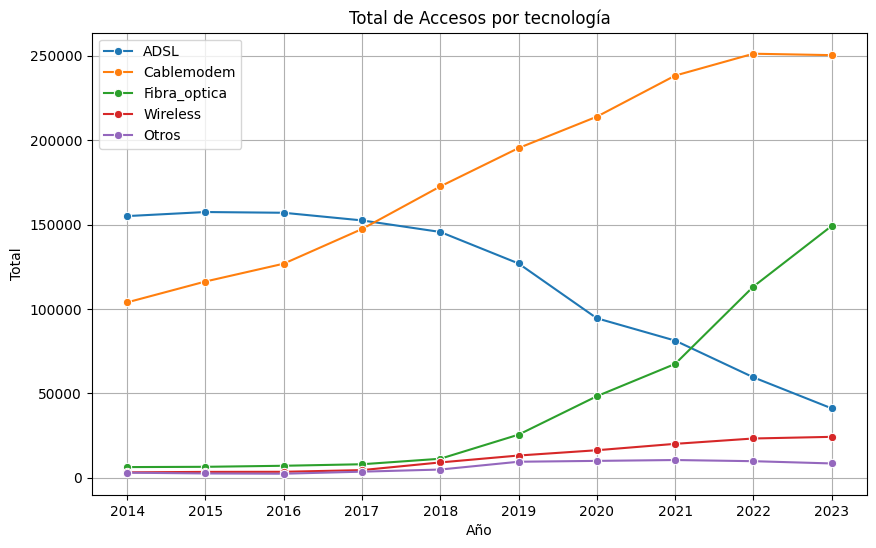

In [31]:
promedio_anio = tecnologia.groupby('Año').agg({'ADSL': 'mean', 'Cablemodem': 'mean', 'Fibra_optica': 'mean', 'Wireless': 'mean', 'Otros': 'mean'})

plt.figure(figsize=(10, 6))

for column in promedio_anio.columns:
    sns.lineplot(x=promedio_anio.index, data=promedio_anio, y=column, label=column, marker='o')

plt.title('Total de Accesos por tecnología')
plt.xticks(ticks=promedio_anio.index)
plt.grid(True)
plt.xlabel('Año')
plt.ylabel('Total')
plt.show()

En este grafico se pueden analizar varios puntos.
- Cablemoden es el acceso mas comun a lo largo de los años, este impulso de crecimiento empezo en el 2017 convirtiendose despues del segundo trimeste la tecnologia mas usada para los accesos de internet. Este crecimiento se estanco en el ultimo año por el fuerte crecimiento de el uso de la fibra optica.

- La fibra optica esta creciendo muy fuertemente como tecnologia se puede estimar que en 2 o 3 años, si clabemoden sigue estacando o reemplazado por la fibra optica, sera la tecnologia mas usada para dar acceso a internet. 

- El ADSL es una tecnologia opsoleta que se esta eliminando su uso a partir de 2018 por otras tecnologias mas eficientes como el Cablemodel o la Fibra optica.

- Wireless esta creciendo muy lentamente, como tecnologia todavia no es relevante para impulsar su conectividad.

Para demostrar esto crearemos 2 graficos de barras para ver la distribución de los accesos por tecnologia por provicia en entre el año 2018 y 2023.

Creo la funcion `graf_barras` para la comparacion de graficos. 
Estare ordenando los datos por Clabemoden ya que es la tecnologia mas usada.

In [55]:
def graf_barras(data, year):
    sns.set(style="whitegrid")
    data.sort_values(by='Cablemodem', ascending=False, inplace=True)

    data = data[['Provincia', 'Cablemodem', 'ADSL', 'Fibra_optica']]
    
    plt.figure(figsize=(12, 8))

    sns.barplot(x='Provincia', y='valor', hue='tipo', data=data.melt(id_vars='Provincia', var_name='tipo', value_name='valor'))

    plt.xlabel('Provincia')
    plt.ylabel('Accesos por Provincia')
    plt.title(f'Tecnologias Usadas por Provincia en {year}')

    plt.legend(title='Leyenda')
    plt.xticks(rotation=90)
    
    plt.tight_layout()
    plt.show()

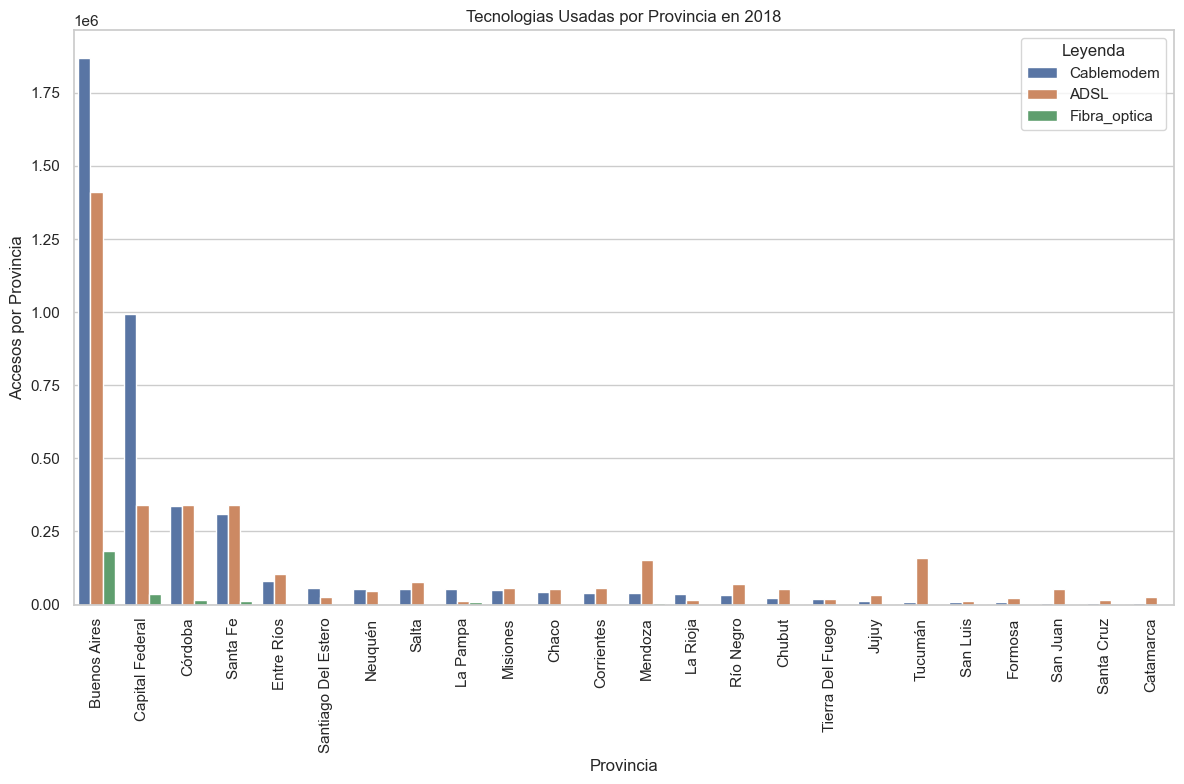

In [56]:
tecno_2018 = tecnologia[tecnologia["Año"] == 2018]

data = tecno_2018.groupby('Provincia').agg({'Cablemodem': 'mean', 'Fibra_optica': 'mean','ADSL': 'mean'}).reset_index()
graf_barras(data, year = 2018)


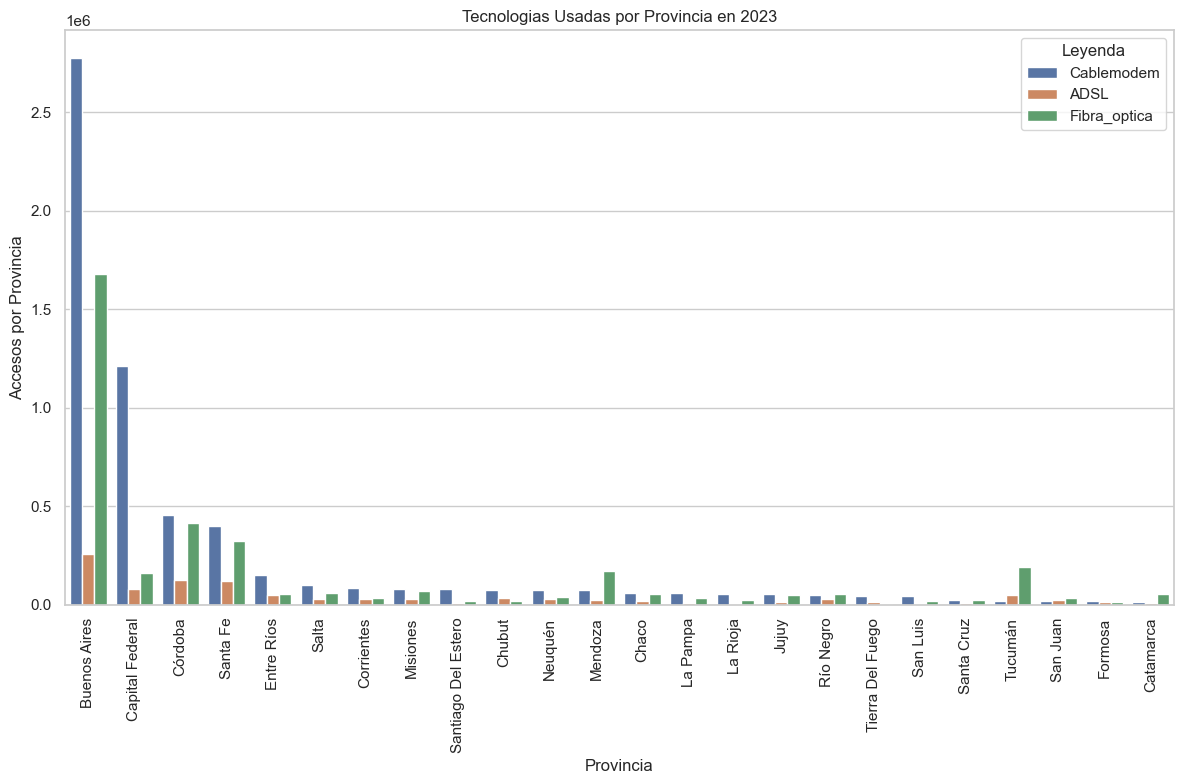

In [57]:
tecno_2023 = tecnologia[tecnologia["Año"] == 2023]
data = tecno_2023.groupby('Provincia').agg({'Cablemodem': 'mean', 'Fibra_optica': 'mean','ADSL': 'mean'}).reset_index()
graf_barras(data, year = 2023)

# Guardar los datos

Guardamos el dataframe en un csv.

In [33]:
tecnologia.to_csv('../Datasets/Cleans/Accesos_tecnologia.csv', index=False)